In [1]:
using VMLS
using LinearAlgebra

## Chapter 12
# Least squares
### 12.1 Least squares problem
We take the small least squares problem of Figure [12.1](https://web.stanford.edu/~boyd/vmls/vmls.pdf#figure.12.1) in VMLS and check that $‖Ax̂− b‖$ is less than $‖Ax− b‖$ for some other value of $x$. 

In [2]:
A = [ 2 0 ; -1 1 ; 0 2 ]
b = [ 1, 0, -1 ]
xhat = [ 1/3, -1/3 ]
rhat = A*xhat -b

3-element Vector{Float64}:
 -0.33333333333333337
 -0.6666666666666666
  0.33333333333333337

In [3]:
norm(rhat)

0.816496580927726

In [4]:
x = [ 1/2, -1/2 ]
r = A*x -b

3-element Vector{Float64}:
  0.0
 -1.0
  0.0

In [5]:
norm(r)

1.0

### 12.2 Solution
**Least squares solution formula.** Let’s check the solution formulas ([12.5](https://web.stanford.edu/~boyd/vmls/vmls.pdf#equation.12.2.5) and
[12.6](https://web.stanford.edu/~boyd/vmls/vmls.pdf#equation.12.2.6)) in VMLS, $x̂ = (A^TA)^{−1}A^T b = A^†b$ for the small example of Figure [12.1](https://web.stanford.edu/~boyd/vmls/vmls.pdf#figure.12.1)) (where $x̂ = (\frac{1}{3},\frac{1}{3})$).

In [6]:
inv(A'*A)*A'*b

2-element Vector{Float64}:
  0.33333333333333337
 -0.33333333333333337

In [7]:
pinv(A)*b

2-element Vector{Float64}:
  0.3333333333333333
 -0.3333333333333335

In [8]:
(A'*A)*xhat - A'*b # Check that normal equations hold

2-element Vector{Float64}:
 -2.220446049250313e-16
  2.220446049250313e-16

**Orthogonality principle.** Let’s check the orthogonality principle ([12.9](https://web.stanford.edu/~boyd/vmls/vmls.pdf#equation.12.2.9)), for the same example. 

In [9]:
z = [-1.1, 2.3];
(A*z)'*rhat

3.9227880203422196e-16

In [10]:
z = [5.3, -1.2];
(A*z)'*rhat

-6.809367884367626e-16

### 12.3 Solving least squares problems
Julia uses the backslash operator to denote the least squares approximate solution: `xhat = A\b`. (The same operator is used to solve square systems of linear equations, and we will see more uses of it in later chapters.)

In [11]:
A = randn(100,20); b = randn(100);
x1 = A\b; # Least squares using backslash operator
x2 = inv(A'*A)*(A'*b); # Using formula
x3 = pinv(A)*b; # Using pseudo-inverse
Q, R = qr(A);
Q = Matrix(Q);
x4 = R\(Q'*b); # Using QR factorization
norm(x1-x2),norm(x2-x3),norm(x3-x4)

(4.1924857341382694e-16, 6.848187576555047e-16, 4.3857381018590646e-16)

**Complexity.** The complexity of solving the least squares problem with $m × n$
matrix $A$ is around $2mn^2$ flops. Let’s check this in Julia by solving a few least
squares problems of different dimensions.

In [12]:
m = 2000; n = 500;
A = randn(m,n); b = randn(m);
@time x = A\b;
@time x = A\b;
m = 4000; n = 500;
A = randn(m,n); b = randn(m);
@time x = A\b;
m = 2000; n = 1000;
A = randn(m,n); b = randn(m);
@time x = A\b;

  0.099346 seconds (3.01 k allocations: 8.010 MiB)
  0.101466 seconds (3.01 k allocations: 8.010 MiB)
  0.171683 seconds (3.01 k allocations: 15.654 MiB)
  0.264406 seconds (6.01 k allocations: 15.971 MiB)


We can see that doubling $m$ approximately doubles the computation time, and
doubling $n$ increases it by around a factor of four. The times above can be used to
guess the speed of the computer on which it was carried out. For example, using
the last problem solved, the number of flops is around $2mn2 = 4 · 10^9$, and it took
around $0.4$ seconds. This suggests a speed of around $10 Gflop/sec$.

**Matrix least squares.** Let’s solve multiple least squares problems with the same
matrix $A$ and different vector $b$.

In [13]:
A = randn(1000,100); B = randn(1000,10);
X = A\B;
# Check that third column of X is least squares solution
# with third column of B
x3 = A\B[:,3];
norm(X[:,3]-x3)

1.4749569398853528e-16

### 12.4 Examples
**Advertising purchases.** We work out the solution of the optimal advertising purchase problem on page [234](https://web.stanford.edu/~boyd/vmls/vmls.pdf#section*.284) of VMLS.

In [14]:
R = [ 0.97 1.86 0.41;
1.23 2.18 0.53;
0.80 1.24 0.62;
1.29 0.98 0.51;
1.10 1.23 0.69;
0.67 0.34 0.54;
0.87 0.26 0.62;
1.10 0.16 0.48;
1.92 0.22 0.71;
1.29 0.12 0.62];
m, n = size(R);
vdes = 1e3 * ones(m);
s = R \ vdes

3-element Vector{Float64}:
   62.07662454385103
   99.98500402826183
 1442.8374625412218

In [15]:
rms(R*s - vdes)

132.63819026326527

**Illumination.** The following code constructs and solves the illumination problem on page [234](https://web.stanford.edu/~boyd/vmls/vmls.pdf#section*.285), and plots two histograms with the pixel intensity distributions (Figure 12.1).

In [16]:
n = 10; # number of lamps
lamps = [ # x, y positions of lamps and height above floor
    4.1 20.4 4;
    14.1 21.3 3.5;
    22.6 17.1 6;
    5.5 12.3 4.0;
    12.2 9.7 4.0;
    15.3 13.8 6;
    21.3 10.5 5.5;
    3.9 3.3 5.0;
    13.1 4.3 5.0;
    20.3 4.2 4.5 ];
N = 25; # grid size
m = N*N; # number of pixels
# construct m x 2 matrix with coordinates of pixel centers
pixels = hcat( 
    reshape( collect(0.5: 1 : N) * ones(1,N), m, 1), 
    reshape( ones(N,1) * collect(0.5: 1 : N)', m, 1));
# The m x n matrix A maps lamp powers to pixel intensities.
# A[i,j] is inversely proportional to the squared distance of
# lamp j to pixel i.
A = zeros(m,n);
for i=1:m
    for j=1:n
        A[i,j] = 1.0 / norm([pixels[i,:]; 0] - lamps[j,:])^2;
        end;
    end;
A = (m/sum(A)) * A; # scale elements of A
# Least squares solution
x = A \ ones(m,1);
rms_ls = rms(A*x .- 1)

0.14039048134276055

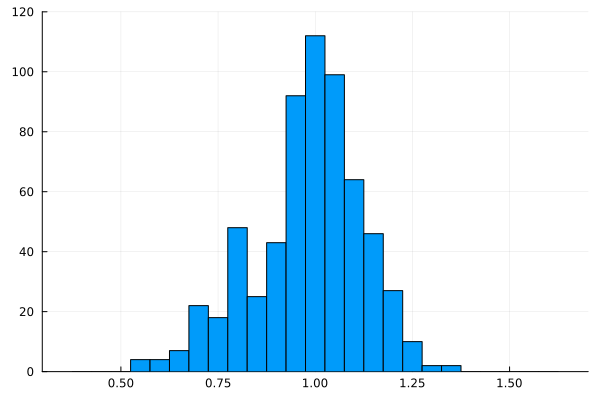

In [17]:
using Plots
histogram(A*x, bins = (0.375:0.05:1.625), legend = false, ylim = (0,120))

In [18]:
# Intensity if all lamp powers are one
rms_uniform = rms(A*ones(n,1) .- 1)

0.24174131853807876

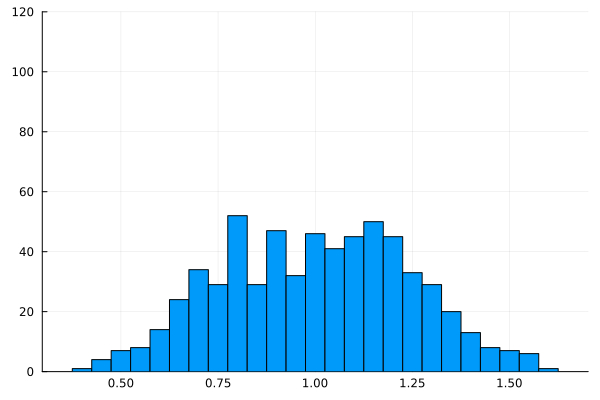

In [19]:
histogram(A*ones(n,1), bins = (0.375:0.05:1.625),
legend = false, ylim = (0,120))

**Figure 12.1** Histogram of pixel illumination values using $p = 1$ (top) and $p̂$
(bottom). The target intensity value is one.